In [1]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Definition of Lotka-Volterra System 
## Parameters:
- **$x_{0}=[5, 3]$**
- **$\theta = [2, 1, 4, 1]$**
- **$\theta=[\alpha, \beta, \gamma, \delta]$**
- **States: $x(t)=[S, W]$**

In [2]:
def lotka_volterra_system(state, t, alpha, beta, gamma, delta):
    s, w = state
    dsdt = alpha * s - beta * s * w
    dwdt = delta * s * w - gamma * w
    return [dsdt, dwdt]

In [3]:
alpha = 2
beta = 1
gamma = 4
delta = 1
initial_state = [5, 3]

## Time Points

In [4]:
t = np.linspace(0, 2, 200)
print(t.shape)

(200,)


## Solving the system

In [5]:
solution = odeint(lotka_volterra_system, initial_state, t, args=(alpha, beta, gamma, delta))
print(solution.shape)

(200, 2)


## Sampling Time Points

In [6]:
# t_sub = np.arange(0, 2, 0.2)
# index = np.int_((t_sub / 0.01))
# solution_sampling = solution[index]
# print(solution_sampling)
# De manera aleatoria
# rng = np.random.RandomState(1)
# training_index = rng.choice(np.arange(len(solution)), size=10, replace=False)
# t_train, y_train = t[training_index], solution[training_index]
# noise_std = 0.75
# y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)
# # Con saltos de dt=0.2
t_sub = np.arange(0, 2, 0.2)
index = np.int_((t_sub / 0.01))  
t_train = t[index]
y_train = solution[index] 
noise_std = 0.075
y_train_noisy = y_train + np.random.normal(loc=0.0, scale=noise_std, size=y_train.shape)  # Añadir ruido
print("Datos seleccionados (con ruido):", y_train_noisy)



Datos seleccionados (con ruido): [[5.0026719  3.02803965]
 [3.97414906 3.24443493]
 [3.14604993 2.87964212]
 [2.68803014 2.37513115]
 [2.65389552 1.73908804]
 [2.82879677 1.33975431]
 [3.33225286 1.1074686 ]
 [3.95884224 1.23517118]
 [4.75600333 1.14021509]
 [5.36408657 1.42581411]]


## Plotting

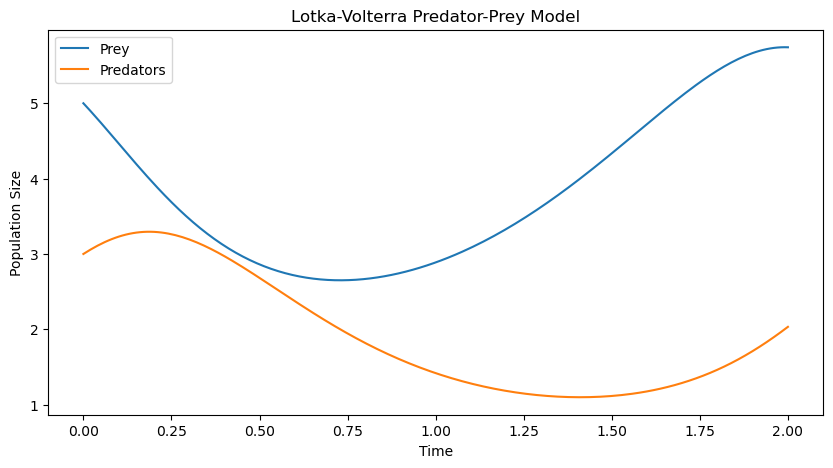

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(t, solution[:, 0], label='Prey')
plt.plot(t, solution[:, 1], label='Predators')
plt.title('Lotka-Volterra Predator-Prey Model')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.show()

## GP approach to inference solutions of LV System

In [8]:
T = t_train.reshape(-1, 1)
Y = y_train_noisy
print(T)

[[0.        ]
 [0.20100503]
 [0.40201005]
 [0.60301508]
 [0.8040201 ]
 [1.00502513]
 [1.20603015]
 [1.40703518]
 [1.6080402 ]
 [1.80904523]]


In [9]:
kernel = RBF(length_scale_bounds=(1e-6, np.inf))

In [10]:
gp = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2)
print(gp)

GaussianProcessRegressor(alpha=0.005625, kernel=RBF(length_scale=1))


In [11]:
gp.fit(T, Y)

GaussianProcessRegressor(alpha=0.005625, kernel=RBF(length_scale=1))

In [12]:
Y_pred, sigma = gp.predict(t.reshape(-1, 1), return_std=True)
print(sigma)

[[0.0702509  0.0702509 ]
 [0.06718977 0.06718977]
 [0.06448749 0.06448749]
 [0.06213578 0.06213578]
 [0.06012208 0.06012208]
 [0.05842948 0.05842948]
 [0.05703693 0.05703693]
 [0.05591978 0.05591978]
 [0.05505061 0.05505061]
 [0.05440018 0.05440018]
 [0.05393853 0.05393853]
 [0.05363593 0.05363593]
 [0.05346378 0.05346378]
 [0.05339535 0.05339535]
 [0.05340616 0.05340616]
 [0.05347438 0.05347438]
 [0.0535809  0.0535809 ]
 [0.05370932 0.05370932]
 [0.05384587 0.05384587]
 [0.05397924 0.05397924]
 [0.05410036 0.05410036]
 [0.0542022  0.0542022 ]
 [0.05427952 0.05427952]
 [0.0543287  0.0543287 ]
 [0.05434749 0.05434749]
 [0.05433483 0.05433483]
 [0.05429071 0.05429071]
 [0.05421596 0.05421596]
 [0.05411212 0.05411212]
 [0.05398136 0.05398136]
 [0.05382626 0.05382626]
 [0.0536498  0.0536498 ]
 [0.05345521 0.05345521]
 [0.05324588 0.05324588]
 [0.05302529 0.05302529]
 [0.05279692 0.05279692]
 [0.05256422 0.05256422]
 [0.05233049 0.05233049]
 [0.05209887 0.05209887]
 [0.05187227 0.05187227]


Text(0.5, 1.0, 'GP for inferencing solutions of Lotka-Volterra System')

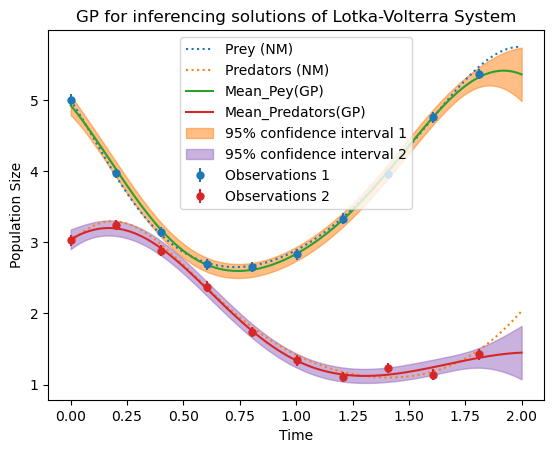

In [13]:
 plt.plot(t, solution, label=['Prey (NM)', 'Predators (NM)'], linestyle='dotted')
 plt.errorbar(t_train, y_train_noisy[:, 0], noise_std, linestyle='None', color='tab:blue', marker='.', markersize=10, label='Observations 1')
 plt.errorbar(t_train, y_train_noisy[:, 1], noise_std, linestyle='None', color='tab:red', marker='.', markersize=10, label='Observations 2')
 plt.plot(t, Y_pred, label=['Mean_Pey(GP)', 'Mean_Predators(GP)'])
 plt.fill_between(t.ravel(), Y_pred[:, 0] - 1.96 * sigma[:, 0], Y_pred[:, 0] + 1.96 * sigma[:, 0], color='tab:orange', alpha=0.5, label=r'95% confidence interval 1')
 plt.fill_between(t.ravel(), Y_pred[:, 1] - 1.96 * sigma[:, 1], Y_pred[:, 1] + 1.96 * sigma[:, 1], color='tab:purple', alpha=0.5, label=r'95% confidence interval 2')
 plt.legend()
 plt.xlabel("Time")
 plt.ylabel("Population Size")
 plt.title("GP for inferencing solutions of Lotka-Volterra System")

## Subplots

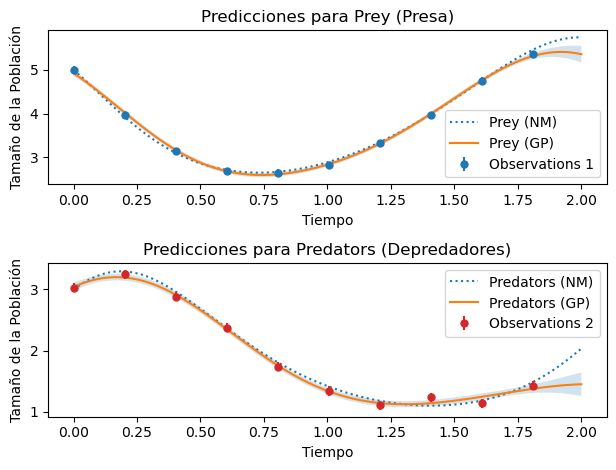

In [14]:
# Suponiendo que Y_pred y sigma están definidos y tienen una longitud de 200
# Redefinimos T para que tenga la misma longitud que Y_pred
# T = np.linspace(0, 10, len(Y_pred))

# Subplot para 'prey'
plt.subplot(2, 1, 1)
plt.plot(t, solution[:, 0], label='Prey (NM)', linestyle='dotted')
plt.errorbar(t_train, y_train_noisy[:, 0], noise_std, linestyle='None', color='tab:blue', marker='.', markersize=10, label='Observations 1')
plt.plot(t, Y_pred[:, 0], label='Prey (GP)')
plt.fill_between(t, Y_pred[:, 0] - sigma[:, 0], Y_pred[:, 0] + sigma[:, 0], alpha=0.2)
plt.title('Predicciones para Prey (Presa)')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.legend()

# Subplot para 'predators'
plt.subplot(2, 1, 2)
plt.plot(t, solution[:, 1], label='Predators (NM)', linestyle='dotted')
plt.plot(t, Y_pred[:, 1], label='Predators (GP)')
plt.errorbar(t_train, y_train_noisy[:, 1], noise_std, linestyle='None', color='tab:red', marker='.', markersize=10, label='Observations 2')
plt.fill_between(t, Y_pred[:, 1] - sigma[:, 1], Y_pred[:, 1] + sigma[:, 1], alpha=0.2)
plt.title('Predicciones para Predators (Depredadores)')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.legend()

plt.tight_layout()
plt.show()




## Probabilistic Solutions 

## Parameters 

In [15]:
import sys
sys.path.append('D:/Users/Roberth/Desktop/B_P')
import GP_B as gp1

## The squared exponential covariance
- **$\dot{C}_{0}(t, t') = \sqrt{\pi} \alpha^{-1} \lambda \exp\left\{-(t-t')^{2}/4\lambda^{2}\right\}$**

In [16]:
a = 0
b = 2
N = 100
ND = 200
la = 8*(b-a) / N
alpha = N
u0 = np.array([[5, 3]]).T # [5, 3]
p = np.array([[2.0, 1.0, 4.0, 1.0]]).T # [2, 1, 4, 1]
t1 = np.reshape(np.linspace(a, b, ND), (1, ND)).T 

## Function LV
- u[0, 0] = S
- u[1, 0] = W

In [17]:
def lotka_volterra(u, p):
    f1 = p[0, 0] * u[0, 0] - p[1, 0] * u[0, 0] * u[1, 0]
    f2 = p[3, 0] * u[0, 0] * u[1, 0] - p[2, 0] * u[1, 0]
    f = np.array([[f1, f2]])
    return f

In [18]:
M, C = gp1.gp_odes(a, b, ND, N, la, alpha, lotka_volterra, u0, p, t1)
print(M.shape)

(200, 2)


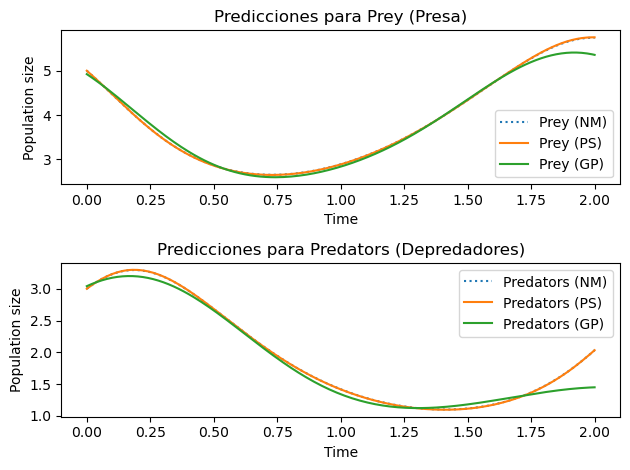

In [19]:
t2 = np.linspace(a, b, ND)
plt.subplot(2, 1, 1)
plt.plot(t, solution[:, 0], label='Prey (NM)', linestyle='dotted')
plt.plot(t2, M[:, 0], label='Prey (PS)')
plt.plot(t, Y_pred[:, 0], label='Prey (GP)')
plt.title('Predicciones para Prey (Presa)')
plt.xlabel('Time')
plt.ylabel('Population size')
plt.legend()

# Subplot para 'predators'
plt.subplot(2, 1, 2)
plt.plot(t, solution[:, 1], label='Predators (NM)', linestyle='dotted')
plt.plot(t2, M[:, 1], label='Predators (PS)')
plt.plot(t, Y_pred[:, 1], label='Predators (GP)')
plt.title('Predicciones para Predators (Depredadores)')
plt.xlabel('Time')
plt.ylabel('Population size')
plt.legend()

plt.tight_layout()
plt.show()

## Estimating Parameters

In [21]:
import arviz as az
import pandas as pd
import pymc as pm 
import pytensor
import pytensor.tensor as pt

from numba import njit
from pymc.ode import DifferentialEquation
from pytensor.compile.ops import as_op
from scipy.optimize import least_squares

print(f"Running on PyMC v{pm.__version__}")

Running on PyMC v5.10.3


In [23]:
%load_ext watermark
%watermark

Last updated: 2024-01-11T22:07:48.205950-05:00

Python implementation: CPython
Python version       : 3.10.13
IPython version      : 8.20.0

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 142 Stepping 10, GenuineIntel
CPU cores   : 8
Architecture: 64bit



In [24]:
%load_ext watermark
az.style.use("arviz-darkgrid")
rng = np.random.default_rng(1234)

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
